# Packages

In [43]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from matplotlib import pyplot as plt 
import seaborn as sns
from statistics import mode 

# Reading Json files

In [2]:
login_df = pd.DataFrame(json.load((open('logins.json'))))
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


### -login dataset

In [3]:
login_df.isnull().any()

login_time    False
dtype: bool

In [4]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null object
dtypes: object(1)
memory usage: 727.8+ KB


In [5]:
print(login_df.login_time[0])

1970-01-01 20:13:18


In [6]:
login_df.login_time=pd.to_datetime(login_df.login_time,format='%Y-%m-%d %H:%M:%S')
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
login_df=login_df.sort_values(by=['login_time']).reset_index().drop(['index'],axis=1)
login_df.tail()

,login_time
93137,1970-04-13 18:48:52
93138,1970-04-13 18:50:19
93139,1970-04-13 18:54:02
93140,1970-04-13 18:54:23
93141,1970-04-13 18:57:38


#### Data extraction and sampling:
- We need to extract new data shows the number of activity in every 15 min. In order to do that, the number activities was calculated in every 15 minutes time laps.
- It would be intersting the hour and the day of the week of the logins in original data. 

In [8]:
login_df['hour']=login_df.set_index('login_time').index.hour
login_df['dow']=login_df.set_index('login_time').index.weekday
login_df.head()

,login_time,hour,dow
0,1970-01-01 20:12:16,20,3
1,1970-01-01 20:13:18,20,3
2,1970-01-01 20:16:10,20,3
3,1970-01-01 20:16:36,20,3
4,1970-01-01 20:16:37,20,3


In [9]:
login_15min=pd.DataFrame(columns=['login_time','login_count'])
login_15min.loc[0]=[login_df.login_time[0],0]


i=0
next_time=login_15min.login_time[i]+timedelta(minutes=15)
print(next_time,login_df.login_time.max())
while next_time <= login_df.login_time.max():
    indx=np.where((login_df.login_time>login_15min.login_time[i])&(login_df.login_time<next_time))[0]
    #if len(indx)==0: print(i,'It is zero')
    login_15min.loc[i+1]=[next_time,len(indx)]
    i=i+1
    next_time=login_15min.loc[i,'login_time']+timedelta(minutes=15)
login_15min.head()    

1970-01-01 20:27:16 1970-04-13 18:57:38


,login_time,login_count
0,1970-01-01 20:12:16,0
1,1970-01-01 20:27:16,7
2,1970-01-01 20:42:16,8
3,1970-01-01 20:57:16,6
4,1970-01-01 21:12:16,3


In [10]:
login_15min.describe()

,login_time,login_count
count,9788,9788.0
unique,9788,60.0
top,1970-04-03 15:27:16,2.0
freq,1,738.0
first,1970-01-01 20:12:16,NaN
last,1970-04-13 18:57:16,NaN


In [11]:
login_15min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9788 entries, 0 to 9787
Data columns (total 2 columns):
login_time     9788 non-null datetime64[ns]
login_count    9788 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 549.4+ KB


In [12]:
print('\nThe number og logins in different hours:\n',login_df['hour'].value_counts())
print('\nThe number og logins in different days:\n',login_df['dow'].value_counts())


The number og logins in different hours:
 22    6607
1     6317
23    6058
0     5993
2     5800
11    5799
21    5623
4     5034
12    4964
3     4831
20    4103
13    3611
14    3426
19    3235
10    3064
15    3038
18    2980
5     2945
16    2832
17    2584
9     1527
6     1138
8      818
7      815
Name: hour, dtype: int64

The number og logins in different days:
 5    19377
6    18167
4    15208
3    11960
2    10339
1     9268
0     8823
Name: dow, dtype: int64


## Part one:
### Data visualization:
#### Loging results:

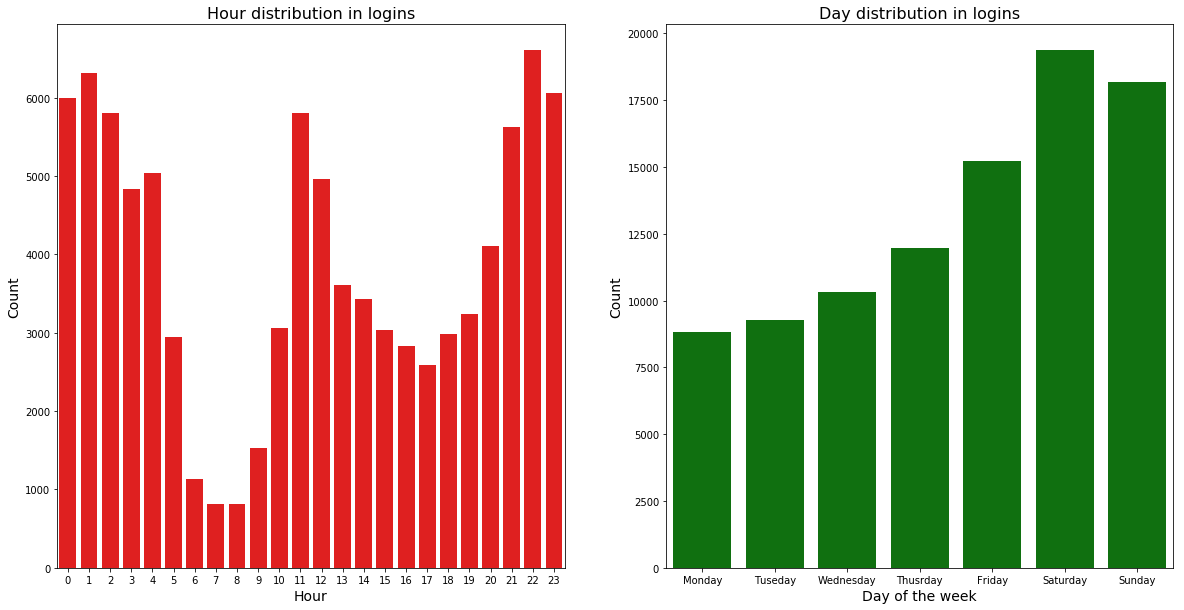

In [13]:
fig,axes=plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=login_df,x='hour',color='r',ax=axes[0])
axes[0].set_xlabel('Hour',fontsize=14)
axes[0].set_ylabel('Count',fontsize=14)
axes[0].set_title('Hour distribution in logins',fontsize=16)
label_name=['Monday','Tuseday','Wednesday','Thusrday','Friday','Saturday','Sunday']
sns.countplot(data=login_df,x='dow',color='g',ax=axes[1])
axes[1].set_xlabel('Day of the week',fontsize=14,)
axes[1].set_ylabel('Count',fontsize=14)
axes[1].set_title('Day distribution in logins',fontsize=16)
axes[1].set_xticklabels(label_name)

plt.show()

In hour distibution graph, there are two group of picks: one between 10-13 and the other between 21-4. The minimum activity has been seen around 5-10 in th emorning. The maximum activity is at 1:00 AM with 6317 activity. 
In weekly distribution, the maximum activity has been seen on Saturdays with 19377 activity.
#### Sampled results:

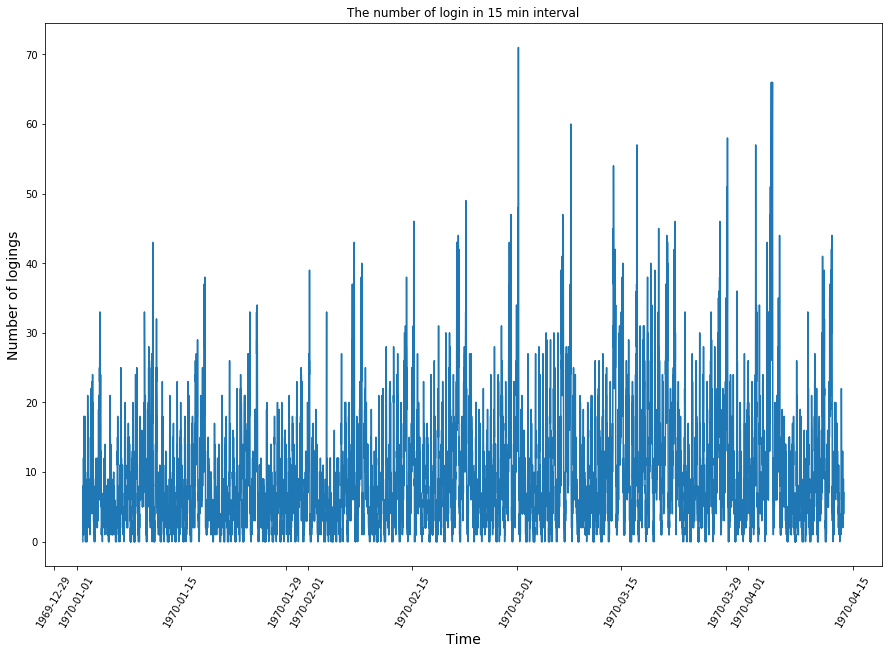

In [14]:
fig,ax=plt.subplots(1,1,figsize=(15,10))
fig=plt.plot(login_15min.set_index('login_time').login_count)
plt.xlabel('Time',fontsize=14)
plt.xticks(rotation=60)
plt.ylabel('Number of logings',fontsize=14)
plt.title('The number of login in 15 min interval')
plt.show()

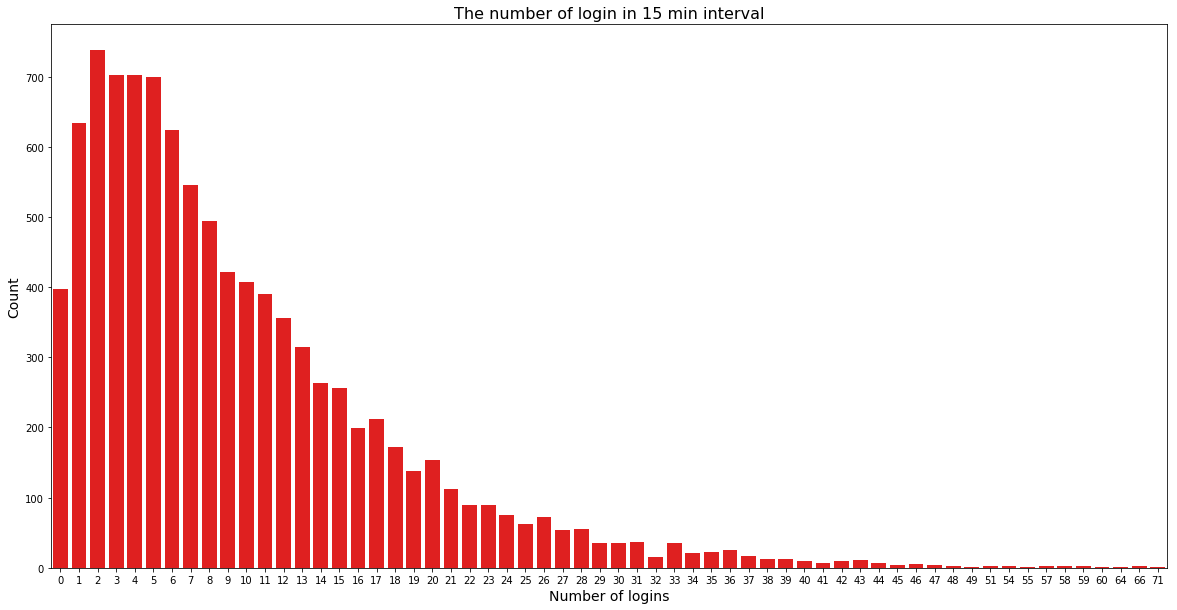

In [15]:
fig,axes=plt.subplots(1,1,figsize=(20,10))
sns.countplot(data=login_15min,x='login_count',color='r',ax=axes)
axes.set_xlabel('Number of logins',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('The number of login in 15 min interval',fontsize=16)
plt.show()

#### Results:
The graph of the sampled data showed has been showed in the timeseries plot. 

In the resampled data, the number of activities in a 15 minutes interval has been presented above graph with red bars. It shows that in every 15 min the number activities is between 1-9 mostly with a pick at 2 activities per 15 min.

## Part two:


### Question1: What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Given data do not provide enough information to conduct and evaluate the experiment.
- To encorage drivers to serve in both cities, we need to reward more those drivers who have been more in both cities  actively. Therefore, as a reward we need to set up the percentage of toll reimbusment. In order to identify which drivers preformed better, we need a log data of duration and locations of each trip and bridge crossing data of every drivers before and after rewarding system was implemented. 
### Question2: Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    ###    a. how you will implement the experiment
    ###    b. what statistical test(s) you will conduct to verify the significance of the observation
    ###    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    
    
- When the data were collected, first we need to define how much toll ratio must be be reimburse based on teh rate of activities. 

- Then, we can test the experiment by checking if there was any improvement in both-city service activity of drivers or not before and after reimbusment setup. And if there was any improvment how much was it. 

A bootstrap hypothesis test can be run to check if the experiment has caused any changes or not. The information of both-city activity of drivers before and after reimbusment implementation would be the distribution of two groups. Here, the null hypothesis is there is no difference between two situation. The alternative hypotesis would be there is a difference. After runing the bootstraping test, based on the p-value the null hypothesis can be rejected or accepted. It shows if the Ultimate managers experiment was successful or not. 
- As a result finally, toll bridge reimbursment can be optimized based on date, time and the number of trips.



## Part three: predicting rider retention
### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

#### Reading data

In [16]:
challenge_df=pd.DataFrame(json.load((open('ultimate_data_challenge.json'))))
challenge_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


#### Extracting new data :
1. Converting data to datetime format
2. Subtracting last trip date from sign up date to get the number of the days between them
3. Identifying people who have no trip in the last 30 days or otherwise as dependent variable

In [17]:
from datetime import datetime
#defininh duration data
challenge_df['duration']=(pd.to_datetime(challenge_df.last_trip_date)-pd.to_datetime(challenge_df.signup_date)).astype(int)/86400000000000
# defining retained as dependent variable
challenge_df['retained']=challenge_df['trips_in_first_30_days'].apply(lambda x: 0 if x ==0 else 1)
challenge_df['duration'].head()

0    143.0
1     96.0
2      1.0
3    170.0
4     47.0
Name: duration, dtype: float64

#### Removing some data

In [18]:
# the type of the phone seems irrelevent
challenge_df=challenge_df.drop(['phone','signup_date','last_trip_date'],axis=1)

challenge_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,duration,retained
0,3.67,5.0,4.7,1.10,King's Landing,15.4,4,True,46.2,143.0,1
1,8.26,5.0,5.0,1.00,Astapor,0.0,0,False,50.0,96.0,0
2,0.77,5.0,4.3,1.00,Astapor,0.0,3,False,100.0,1.0,1
3,2.36,4.9,4.6,1.14,King's Landing,20.0,9,True,80.0,170.0,1
4,3.13,4.9,4.4,1.19,Winterfell,11.8,14,False,82.4,47.0,1


#### Checking for missing values and dealing with them

In [19]:
challenge_df.isnull().any()

avg_dist                  False
avg_rating_by_driver       True
avg_rating_of_driver       True
avg_surge                 False
city                      False
surge_pct                 False
trips_in_first_30_days    False
ultimate_black_user       False
weekday_pct               False
duration                  False
retained                  False
dtype: bool

In [20]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(challenge_df.loc[:, ['avg_rating_by_driver','avg_rating_of_driver']])
challenge_df.loc[:,['avg_rating_by_driver','avg_rating_of_driver']] =imputer.transform(challenge_df.loc[:, ['avg_rating_by_driver','avg_rating_of_driver']])
challenge_df.isnull().any()

/Users/leilasapple/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


avg_dist                  False
avg_rating_by_driver      False
avg_rating_of_driver      False
avg_surge                 False
city                      False
surge_pct                 False
trips_in_first_30_days    False
ultimate_black_user       False
weekday_pct               False
duration                  False
retained                  False
dtype: bool

#### Final data

In [21]:
challenge_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,duration,retained
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,92.790100,0.692200
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503,62.129822,0.461588
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,27.000000,0.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000,110.000000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,150.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,181.000000,1.000000


In [22]:
challenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
duration                  50000 non-null float64
retained                  50000 non-null int64
dtypes: bool(1), float64(7), int64(2), object(1)
memory usage: 3.9+ MB


### Visualization 
1. Histograms for weekday_pct, city, avg_dist and duration
2. Historam of dependent variable 'retained'
3. Pairwise plot of data

In [74]:
n_dist,b_dist=np.histogram(challenge_df.avg_dist,bins=161*2)
print('most popular distance: %f '%b_dist[np.argmax(n_dist)])
n_dur,b_dur=np.histogram(challenge_df.duration,bins=181)
print('most popular duration: %f '%b_dur[np.argmax(n_dur)])

most popular distance: 2.499379 
most popular duration: 1.000000 


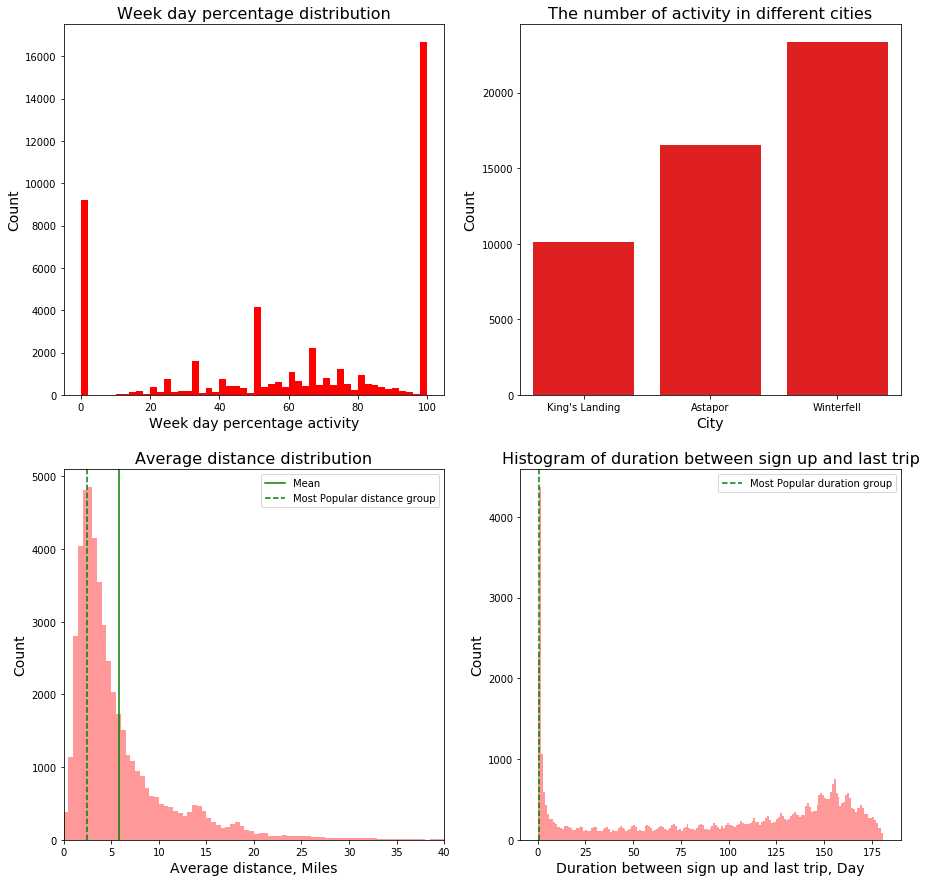

In [76]:
fig,axes=plt.subplots(2,2,figsize=(15,15))
axes[0,0].hist(challenge_df.weekday_pct,bins=50,color='r')
axes[0,0].set_xlabel('Week day percentage activity',fontsize=14)
axes[0,0].set_ylabel('Count',fontsize=14)
axes[0,0].set_title('Week day percentage distribution',fontsize=16)

sns.countplot(data=challenge_df,x='city',color='r',ax=axes[0,1])
axes[0,1].set_xlabel('City',fontsize=14)
axes[0,1].set_ylabel('Count',fontsize=14)
axes[0,1].set_title('The number of activity in different cities',fontsize=16)

sns.distplot(challenge_df.avg_dist,kde=False,color='r',bins=161*2,ax=axes[1,0])
axes[1,0].axvline(x=challenge_df.avg_dist.mean(),color='g',label='Mean')
axes[1,0].axvline(x=b_dist[np.argmax(n_dist)],color='g',label='Most Popular distance group',linestyle='--')
axes[1,0].legend()
axes[1,0].set_xlabel('Average distance, Miles',fontsize=14)
axes[1,0].set_ylabel('Count',fontsize=14)
axes[1,0].set_xlim([0,40])
axes[1,0].set_title('Average distance distribution',fontsize=16)

sns.distplot(challenge_df.duration,kde=False,color='r',bins=181,ax=axes[1,1])
axes[1,1].set_xlabel('Duration between sign up and last trip, Day',fontsize=14)
axes[1,1].set_ylabel('Count',fontsize=14)
axes[1,1].set_title('Histogram of duration between sign up and last trip',fontsize=16)
axes[1,1].axvline(x=b_dur[np.argmax(n_dur)],color='g',label='Most Popular duration group',linestyle='--')
axes[1,1].legend()
plt.show()


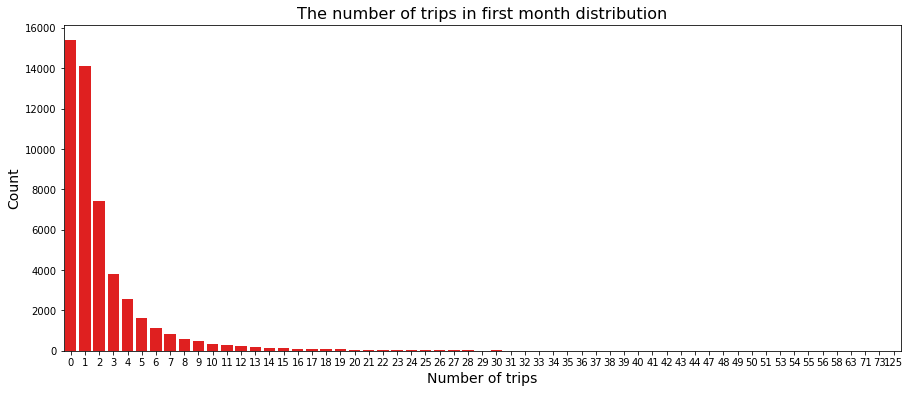

In [24]:
fig,axes=plt.subplots(1,1,figsize=(15,6))
sns.countplot(data=challenge_df,x='trips_in_first_30_days',color='r',ax=axes)
axes.set_xlabel('Number of trips',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('The number of trips in first month distribution',fontsize=16)
plt.show()

In [25]:
challenge_df.keys()

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user',
       'weekday_pct', 'duration', 'retained'],
      dtype='object')

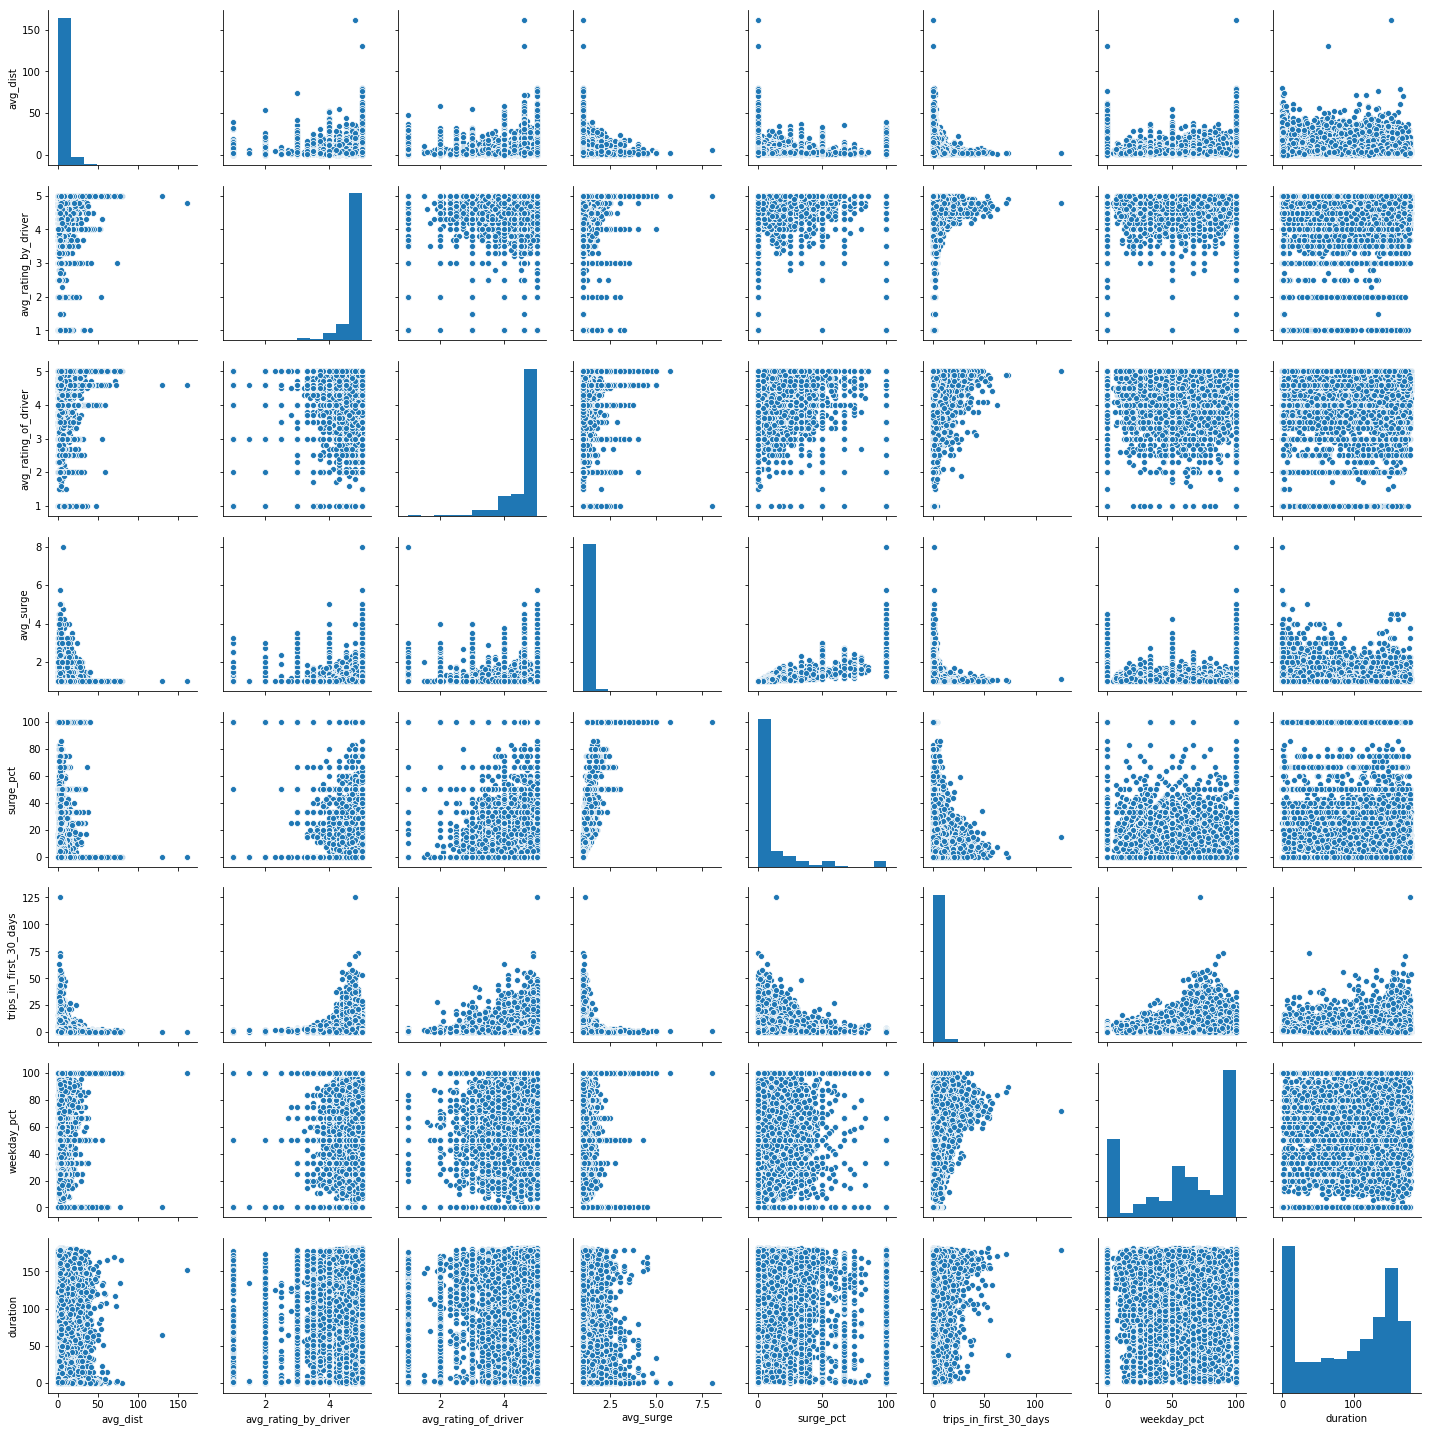

In [26]:

sns.pairplot(challenge_df.loc[:,['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct',
       'trips_in_first_30_days', 'weekday_pct','duration']])

In [27]:
challenge_df.corr(method='pearson').sort_values(by=['retained'])

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,duration,retained
duration,-0.109431,-0.032651,-0.015183,-0.016809,0.004068,0.164784,0.165035,0.020408,1.000000,-0.211047
avg_dist,1.000000,0.079793,0.028508,-0.081491,-0.104414,-0.136329,0.032310,0.101652,-0.109431,-0.070223
avg_rating_of_driver,0.028508,0.101660,1.000000,-0.021653,-0.003290,-0.011060,-0.001916,0.012587,-0.015183,-0.027820
avg_rating_by_driver,0.079793,1.000000,0.101660,0.010498,0.019964,-0.039097,0.009328,0.020366,-0.032651,-0.019392
weekday_pct,0.101652,0.020366,0.012587,-0.110071,-0.144918,0.050388,0.035998,1.000000,0.020408,-0.006712
avg_surge,-0.081491,0.010498,-0.021653,1.000000,0.793582,-0.001841,-0.078791,-0.110071,-0.016809,0.010328
surge_pct,-0.104414,0.019964,-0.003290,0.793582,1.000000,0.005720,-0.106861,-0.144918,0.004068,0.011245
ultimate_black_user,0.032310,0.009328,-0.001916,-0.078791,-0.106861,0.112210,1.000000,0.035998,0.165035,0.037930
trips_in_first_30_days,-0.136329,-0.039097,-0.011060,-0.001841,0.005720,1.000000,0.112210,0.050388,0.164784,0.400560
retained,-0.070223,-0.019392,-0.027820,0.010328,0.011245,0.400560,0.037930,-0.006712,-0.211047,1.000000


In [86]:
np.sort(np.abs(challenge_df.corr(method='pearson').retained))

array([0.0067125 , 0.01032781, 0.01124456, 0.0193917 , 0.02782013,
       0.03792978, 0.07022349, 0.21104711, 0.40056042, 1.        ])

#### Results
- New extracted data sets:
    - 'retained': with value of 0 for users who have no trips in the first 30 days and 1 for others. 
    - 'duration': number of days between sign up date and the date of of last trip.
- Few histogram and scatter plot were generated. 
    - weekday_pct histogram shows that most people lay under having 100% activity in weekdays or non. 
    - Number of trips reveals that most people have not register any trips at all in first 30 days.
    - city histogram  shows that most of useers has signed up in Witerfell, following by Astapor and King's Landing cities.
    - Distance histpgram shows that most users has an average of 2.5 miles.
    - The histogram of duration indicates taht most people signed up a day before their last trip. That may explain why we have lots of low values in other data vaiables such as average distance or number of trips.
    - Checking retained value shows that about 69% of users were identified as retained. 
- Checking correlation betwen data: Although the highest correlation value is between trips_in_first_30_days and reatined, since retained values are driven from trips_in_first_30_days values, it would be considered. Other than this, between dependend variable (retained) and duration there is the best correlation with absolute value of 0.211047. It foloows by 0.07022349 and 0.03792978 for average distance and ultimate_black_user respectively. 

### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [28]:
challenge_df.keys()

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user',
       'weekday_pct', 'duration', 'retained'],
      dtype='object')

#### Defining dependend and independend variables as X and Y 

In [29]:
X_numeric = challenge_df.loc[:, ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct',
                                 'weekday_pct','duration']]
X_categorical = challenge_df.loc[:, ['city', 'ultimate_black_user']]
Y = challenge_df.loc[:, 'retained']

#### Dealing with categorical data using OneHotEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X_categorical.iloc[:, 0] = LabelEncoder().fit_transform(X_categorical.iloc[:, 0])
X_categorical.iloc[:, 1] = LabelEncoder().fit_transform(X_categorical.iloc[:, 1])
onehotencoder = OneHotEncoder(categorical_features = [0,1])
X_categorical = onehotencoder.fit_transform(X_categorical).toarray()
#y = LabelEncoder().fit_transform(y)

/Users/leilasapple/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [33]:
X=np.concatenate((X_numeric, X_categorical), axis=1)
print(np.shape(X))

(50000, 12)


#### Spliting data into training, validation ans test set 

In [34]:
# Splitting the dataset into the Training set, Validation set and Test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train_valid, X_test, Y_train_valid, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.15, random_state = 0)
print(np.shape(X_train),np.shape(X_valid),np.shape(X_test),np.shape(X_test)[0]/np.shape(X)[0])

(42500, 12) (7500, 12) (7500, 12) 0.15


#### Training and tuning the model

In [36]:
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators'      : [500,600,700],
    'max_depth'         : [8, 10,15],
    'random_state'      : [0],
    #'max_features': ['auto'],
    #'criterion' :['gini']
}

clf=RandomForestClassifier(n_estimators=10)
grid=GridSearchCV(clf,parameters,cv=5)
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'max_depth': 10, 'n_estimators': 500, 'random_state': 0}


Text(0.5, 0, 'Relative Importance')

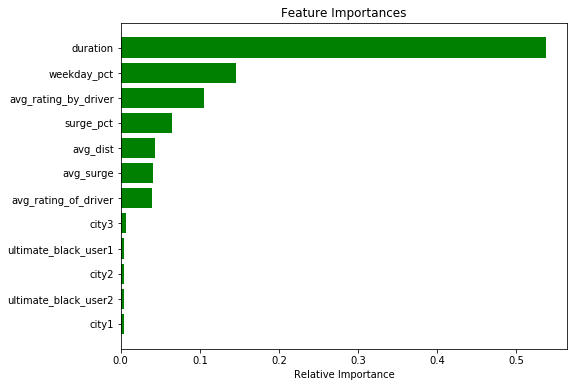

In [39]:
importances = rf_clf.feature_importances_
features=['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct','weekday_pct','duration',
            'city1','city2','city3','ultimate_black_user1','ultimate_black_user2']
indices = np.argsort(importances)

plt.figure(1,figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[j] for j in indices])
plt.xlabel('Relative Importance')

#### Validating the model

In [90]:
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
rf_clf=grid.best_estimator_
print(roc_auc_score(Y_valid, rf_clf.predict(X_valid))) 

0.7868290668868703


In [92]:
Y_pred=rf_clf.predict(X_test)
print('AUC: %f'%roc_auc_score(Y_test, Y_pred)) 
print('F1 score: %f'%f1_score(Y_test, Y_pred, average='binary')  )
print("Accuracy: %.2f%%" % (accuracy_score(Y_test, Y_pred) * 100.0))

AUC: 0.786829
F1 score: 0.884238
Accuracy: 83.48%


In [96]:
print('Retained rate: %f'%(Y_pred.mean()*100))

Retained rate: 73.506667


### 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

- Using a random forest model results about 83.5% accuracy. The model predicted about 73.5% of drivers would be retained with accuracy of 83.5%. Two improve the model it would be better to use the model with more homogenized users such as people who are mostly active during week days. Or people who have signed up for a longer time. 
- Most effetive variable are the duration between sign up and the last trip, week days activities and the rate is given by drivers. People who have signed up sooner has most impacts on the rate of retained outcomes. Therefore, it may suggest that to refine the model and exmine a new study it is better to focus on people who have the lonest activity or the people who just joined in. 
- The other posible factor is people who are most active during week days. So, it may better focus on people who  only active during week days or people who are active during weekends. 
- The satisfaction of the driver is another factor. Therefore, some secondary factors such as waiting time for dirvers, toll reimbursment amoount, road conditions and etc may increase this parameter. Marketing and considering some encouraging approach like haveing discount for driver who have longer activity is another method. 
